<a href="https://colab.research.google.com/github/mortonsguide/axis-model-suite/blob/main/Electron_Morton_Benchmark_4_4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

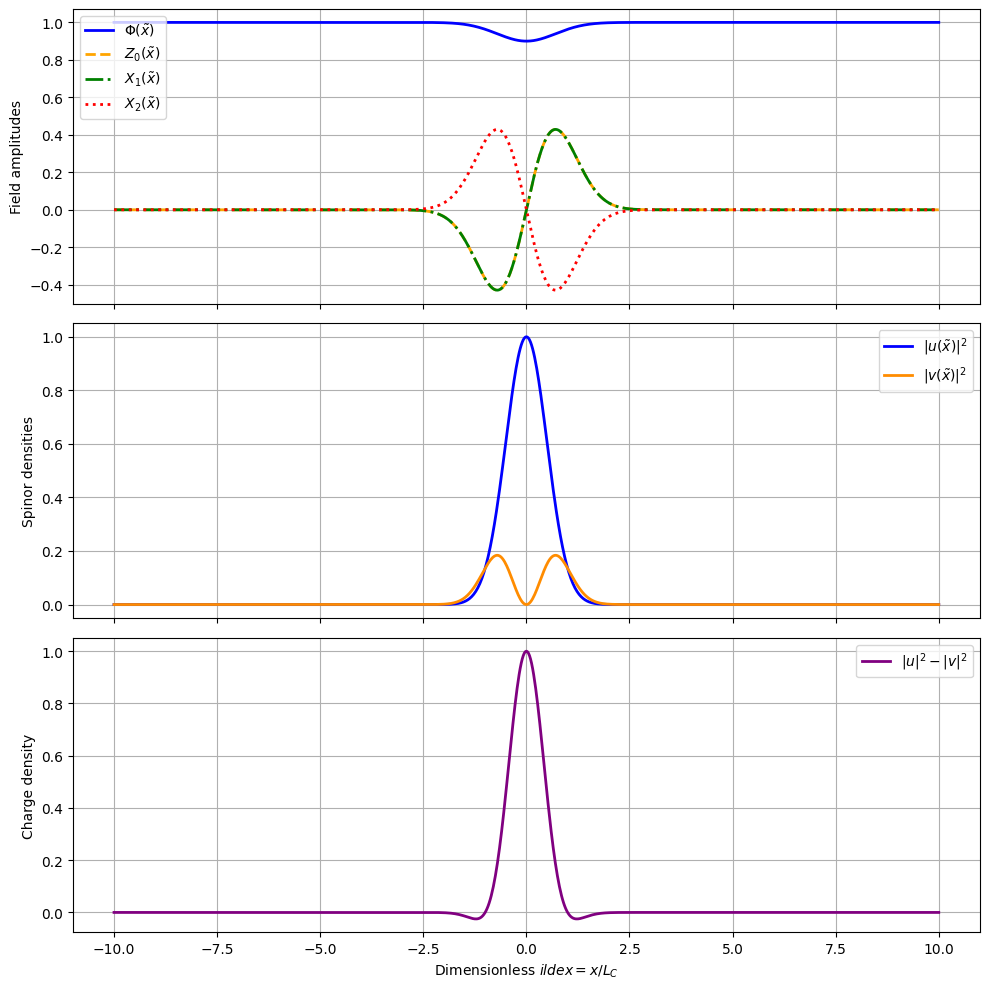

Saved PDF to: /content/electron_morton_dimless_profiles.pdf
Saved PNG to: /content/electron_morton_dimless_profiles.png


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

# --- Parameters ---
lambda_phi = 0.35
g_z = 0.7
g_x = 0.3
g_xz = 0.4
alpha = 0.18
m = 1.0
delta = 1.0
gamma = 1.0

# --- Domain ---
x_max = 10
x_mesh = np.linspace(0, x_max, 400)

# --- Initial guess for 12-component system
def guess(x):
    return np.vstack([
        x * np.exp(-x**2),                     # Z0
        (1 - 2*x**2) * np.exp(-x**2),          # Z0'
        x * np.exp(-x**2),                     # X1
        (1 - 2*x**2) * np.exp(-x**2),          # X1'
        -x * np.exp(-x**2),                    # X2
        -(1 - 2*x**2) * np.exp(-x**2),         # X2'
        1 - 0.1 * np.exp(-x**2),               # Phi
        0.2 * x * np.exp(-x**2),               # Phi'
        np.exp(-x**2),                         # u
        -2 * x * np.exp(-x**2),                # u'
        x * np.exp(-x**2),                     # v
        (1 - 2*x**2) * np.exp(-x**2)           # v'
    ])

# --- Coupled ODE system
def odes(x, y):
    Z0, dZ0, X1, dX1, X2, dX2, Phi, dPhi, u, du, v, dv = y
    ddZ0 = -delta * Z0 - g_xz * Phi * (X1 + X2)
    ddX1 = -gamma * X1 - g_xz * Phi * Z0
    ddX2 = -gamma * X2 - g_xz * Phi * Z0
    ddPhi = -lambda_phi * (Phi**3 - Phi) + 2 * alpha * Phi * Z0**2 + g_xz * Z0 * (X1 + X2)
    ddu = - (g_z * Z0 + g_x * (X1 + X2)) * v - m * u
    ddv =   (g_z * Z0 + g_x * (X1 + X2)) * u + m * v
    return np.vstack([
        dZ0, ddZ0,
        dX1, ddX1,
        dX2, ddX2,
        dPhi, ddPhi,
        du, ddu,
        dv, ddv
    ])

# --- Boundary conditions for 12-component system

def bc(ya, yb):
    return np.array([
        ya[0], ya[2], ya[4],      # Z0(0), X1(0), X2(0)
        ya[7], ya[10],            # Phi'(0), v(0)
        yb[0], yb[2], yb[4],      # Z0, X1, X2 at xmax
        yb[6] - 1.0,              # Phi(xmax) = 1
        yb[8], yb[10], yb[1]      # u(xmax), v(xmax), Z0'(xmax)
    ])

# --- Solve BVP
sol = solve_bvp(odes, bc, x_mesh, guess(x_mesh), tol=1e-5, max_nodes=10000)

# --- Mirror and extract fields
x_full = np.concatenate((-sol.x[::-1], sol.x))
Z0 = np.concatenate((-sol.y[0][::-1], sol.y[0]))
X1 = np.concatenate((-sol.y[2][::-1], sol.y[2]))
X2 = np.concatenate((-sol.y[4][::-1], sol.y[4]))
Phi = np.concatenate((sol.y[6][::-1], sol.y[6]))
u = np.concatenate((sol.y[8][::-1], sol.y[8]))
v = np.concatenate((-sol.y[10][::-1], sol.y[10]))

rho_u = np.abs(u)**2
rho_v = np.abs(v)**2
rho_q = rho_u - rho_v

# --- Plot
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

axs[0].plot(x_full, Phi, label=r'$\Phi(\tilde{x})$', color='blue', linewidth=2)
axs[0].plot(x_full, Z0,  label=r'$Z_0(\tilde{x})$', color='orange', linewidth=2, linestyle='--')
axs[0].plot(x_full, X1,  label=r'$X_1(\tilde{x})$', color='green', linewidth=2, linestyle='-.')
axs[0].plot(x_full, X2,  label=r'$X_2(\tilde{x})$', color='red', linewidth=2, linestyle=':')
axs[0].set_ylabel("Field amplitudes")
axs[0].legend(loc='upper left')
axs[0].grid(True)

axs[1].plot(x_full, rho_u, label=r'$|u(\tilde{x})|^2$', color='blue', linewidth=2)
axs[1].plot(x_full, rho_v, label=r'$|v(\tilde{x})|^2$', color='darkorange', linewidth=2)
axs[1].set_ylabel("Spinor densities")
axs[1].legend(loc='upper right')
axs[1].grid(True)

axs[2].plot(x_full, rho_q, label=r'$|u|^2 - |v|^2$', color='purple', linewidth=2)
axs[2].set_xlabel("Dimensionless $\tilde{x} = x / L_C$")
axs[2].set_ylabel("Charge density")
axs[2].legend(loc='upper right')
axs[2].grid(True)

fig.tight_layout()
plt.show()

# Save to Colab-accessible directory
pdf_path = "/content/electron_morton_dimless_profiles.pdf"
png_path = "/content/electron_morton_dimless_profiles.png"

fig.savefig(pdf_path, bbox_inches='tight')
fig.savefig(png_path, dpi=300, bbox_inches='tight')

print("Saved PDF to:", pdf_path)
print("Saved PNG to:", png_path)

,Quantity,Value (SI),Units
0,Planck length ℓ_P,1.616e-35,m
1,Classical electron radius r_e,1.409e-15,m
2,Experimental upper bound on radius,1.000e-19,m
3,Electron rest energy m_e c^2,8.187e-14,J
4,Self-energy at ℓ_P: U(ℓ_P),7.137e+06,J
5,Self-energy at r_e: U(r_e),8.187e-14,J
6,Self-energy at 1e-19 m: U(1e-19 m),1.154e-09,J



Saved figure: electron_radius_self_energy_plot.png


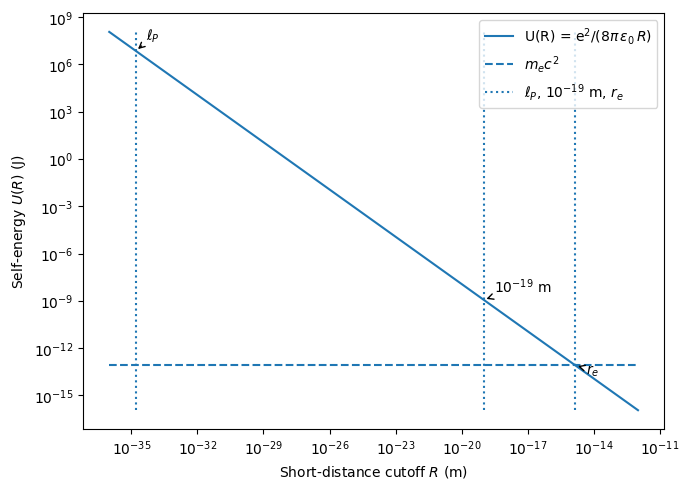

In [ ]:
# Electron radius & self-energy analysis
# Produces: (1) inline summary table, (2) high-res PNG figure

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# --- Constants (CODATA SI) ---
eps0 = 8.8541878128e-12     # vacuum permittivity, F/m
e    = 1.602176634e-19      # elementary charge, C
me   = 9.1093837015e-31     # electron mass, kg
c    = 299792458.0          # speed of light, m/s
hbar = 1.054571817e-34      # reduced Planck constant, J*s
G    = 6.67430e-11          # Newton's constant, m^3 kg^-1 s^-2

# --- Derived scales ---
ell_P = (hbar * G / c**3) ** 0.5                  # Planck length
r_e   = e**2 / (8.0 * pi * eps0 * me * c**2)      # classical electron radius
r_exp_upper = 1e-19                                # experimental upper bound (order-of-mag.)

def U_of_R(R):                                    # electrostatic self-energy with cutoff R
    return e**2 / (8.0 * pi * eps0 * R)

mc2 = me * c**2

# --- Summary table ---
df = pd.DataFrame({
    "Quantity": [
        "Planck length ℓ_P",
        "Classical electron radius r_e",
        "Experimental upper bound on radius",
        "Electron rest energy m_e c^2",
        "Self-energy at ℓ_P: U(ℓ_P)",
        "Self-energy at r_e: U(r_e)",
        "Self-energy at 1e-19 m: U(1e-19 m)"
    ],
    "Value (SI)": [
        ell_P,
        r_e,
        r_exp_upper,
        mc2,
        U_of_R(ell_P),
        U_of_R(r_e),
        U_of_R(r_exp_upper)
    ],
    "Units": ["m","m","m","J","J","J","J"]
})

# Display table with scientific notation (3 sig figs)
df_display = df.copy()
df_display["Value (SI)"] = df_display["Value (SI)"].map(lambda x: f"{x:.3e}")
display(df_display)

# --- Plot ---
R_vals = np.logspace(-36, -12, 400)       # 1e-36 to 1e-12 m
U_vals = U_of_R(R_vals)

plt.figure(figsize=(7,5))
plt.loglog(R_vals, U_vals, label="U(R) = e$^2$/(8$\\pi\\,\\varepsilon_0\\,R$)")
plt.hlines(mc2, R_vals.min(), R_vals.max(), linestyles="--", label="$m_e c^2$")
plt.vlines([ell_P, r_exp_upper, r_e], ymin=U_vals.min(), ymax=U_vals.max(), linestyles=":",
           label="$\\ell_P$, $10^{-19}$ m, $r_e$")
plt.annotate("$\\ell_P$", (ell_P, U_of_R(ell_P)), xytext=(3*ell_P, U_of_R(ell_P)*5),
             arrowprops=dict(arrowstyle="->"))
plt.annotate("$10^{-19}$ m", (r_exp_upper, U_of_R(r_exp_upper)), xytext=(3*r_exp_upper, U_of_R(r_exp_upper)*3),
             arrowprops=dict(arrowstyle="->"))
plt.annotate("$r_e$", (r_e, U_of_R(r_e)), xytext=(3*r_e, U_of_R(r_e)*0.3),
             arrowprops=dict(arrowstyle="->"))
plt.xlabel("Short-distance cutoff $R$ (m)")
plt.ylabel("Self-energy $U(R)$ (J)")
plt.legend()
plt.tight_layout()

# Save high-resolution PNG for paper
plt.savefig("electron_radius_self_energy_plot.png", dpi=300)

print("\nSaved figure: electron_radius_self_energy_plot.png")
